#DEFINE

In [1]:
import torch
import warnings
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
warnings.filterwarnings('ignore')
torch.cuda.empty_cache()

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
# Set the working directory to "Skin_Cancer"
os.chdir('/home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Scopus/YoloV8')

# Verify the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Skin_Cancer


In [6]:
import wandb
# Nonaktifkan wandb secara global
# wandb.init(mode="disabled")
os.environ["WANDB_DISABLED"] = "true"

In [7]:
# !pip install ultralytics==8.0.196

In [8]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 7g.40gb, 40337MiB)
Setup complete ✅ (256 CPUs, 1007.7 GB RAM, 1310.8/1757.8 GB disk)


In [9]:
from IPython.display import display, Image

In [10]:
# !pip install roboflow

In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="WLgFrqahdqAynB9ah60A")
project = rf.workspace("comvis-kuueo").project("ham_10000")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`


In [12]:
# !pip install -U ultralytics

In [13]:
pip install --upgrade torch

Note: you may need to restart the kernel to use updated packages.


In [14]:
print(torch.__version__)

2.4.1+cu121


In [15]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=224 plots=True

Ultralytics YOLOv8.2.87 🚀 Python-3.10.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 7g.40gb, 40337MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Skin_Cancer/HAM_10000-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

In [16]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)


PyTorch version: 2.4.1+cu121
torchvision version: 0.19.1+cu121


In [17]:
# !pip install torchvision --upgrade --index-url https://download.pytorch.org/whl/cu121

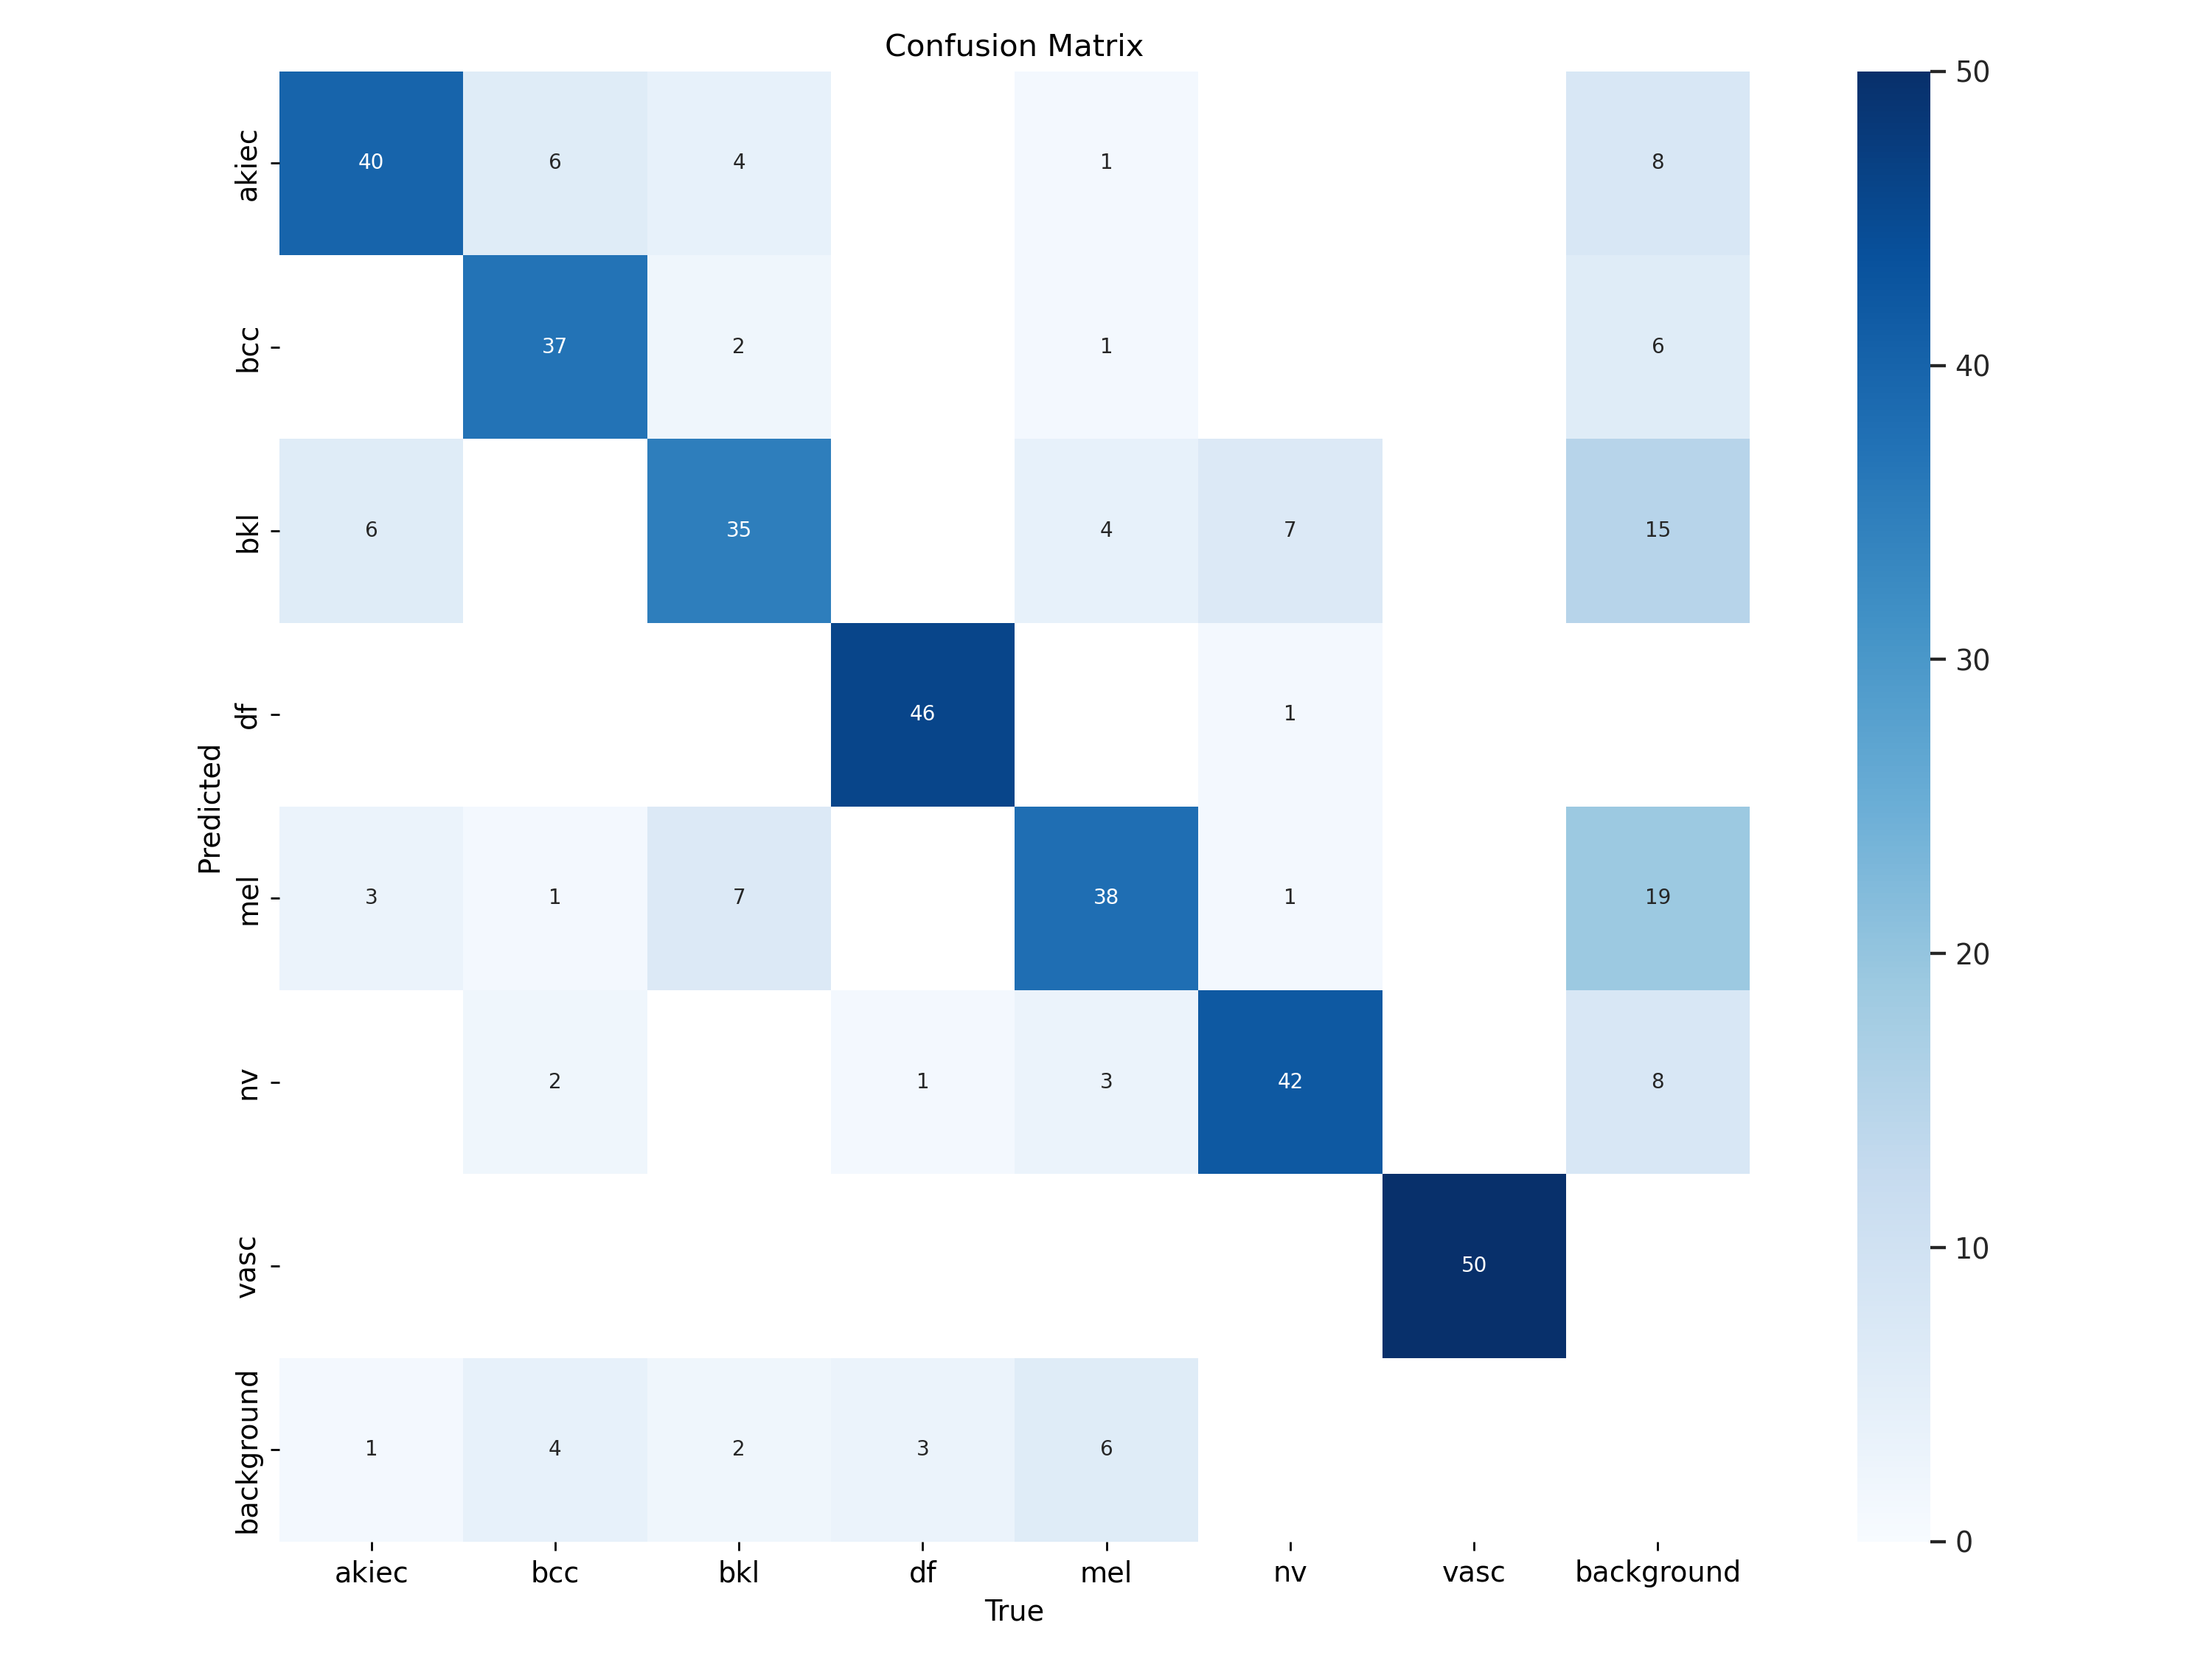

In [25]:
Image(filename=f'./runs/detect/train9/confusion_matrix.png', width=600)

In [39]:
%cd /home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Scopus/YoloV8/

!yolo task=detect mode=val model= /home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Scopus/YoloV8/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Skin_Cancer
Ultralytics YOLOv8.2.87 🚀 Python-3.10.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB MIG 7g.40gb, 40337MiB)
Model summary (fused): 218 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/jovyan/dreamidssdinus_gmail.com/Generative_Chatbot/Skin_Canc
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        350        354      0.828       0.85       0.89      0.672
                 akiec         50         50      0.838       0.88      0.902      0.627
                   bcc         50         50      0.842       0.76      0.895      0.555
                   bkl         50         50      0.682       0.76      0.771      0.596
                    df         50         50      0.958      0.917      0.956      0.689
                   mel         50         53      0.661      0.774      0.776        0.6
                    nv         50       

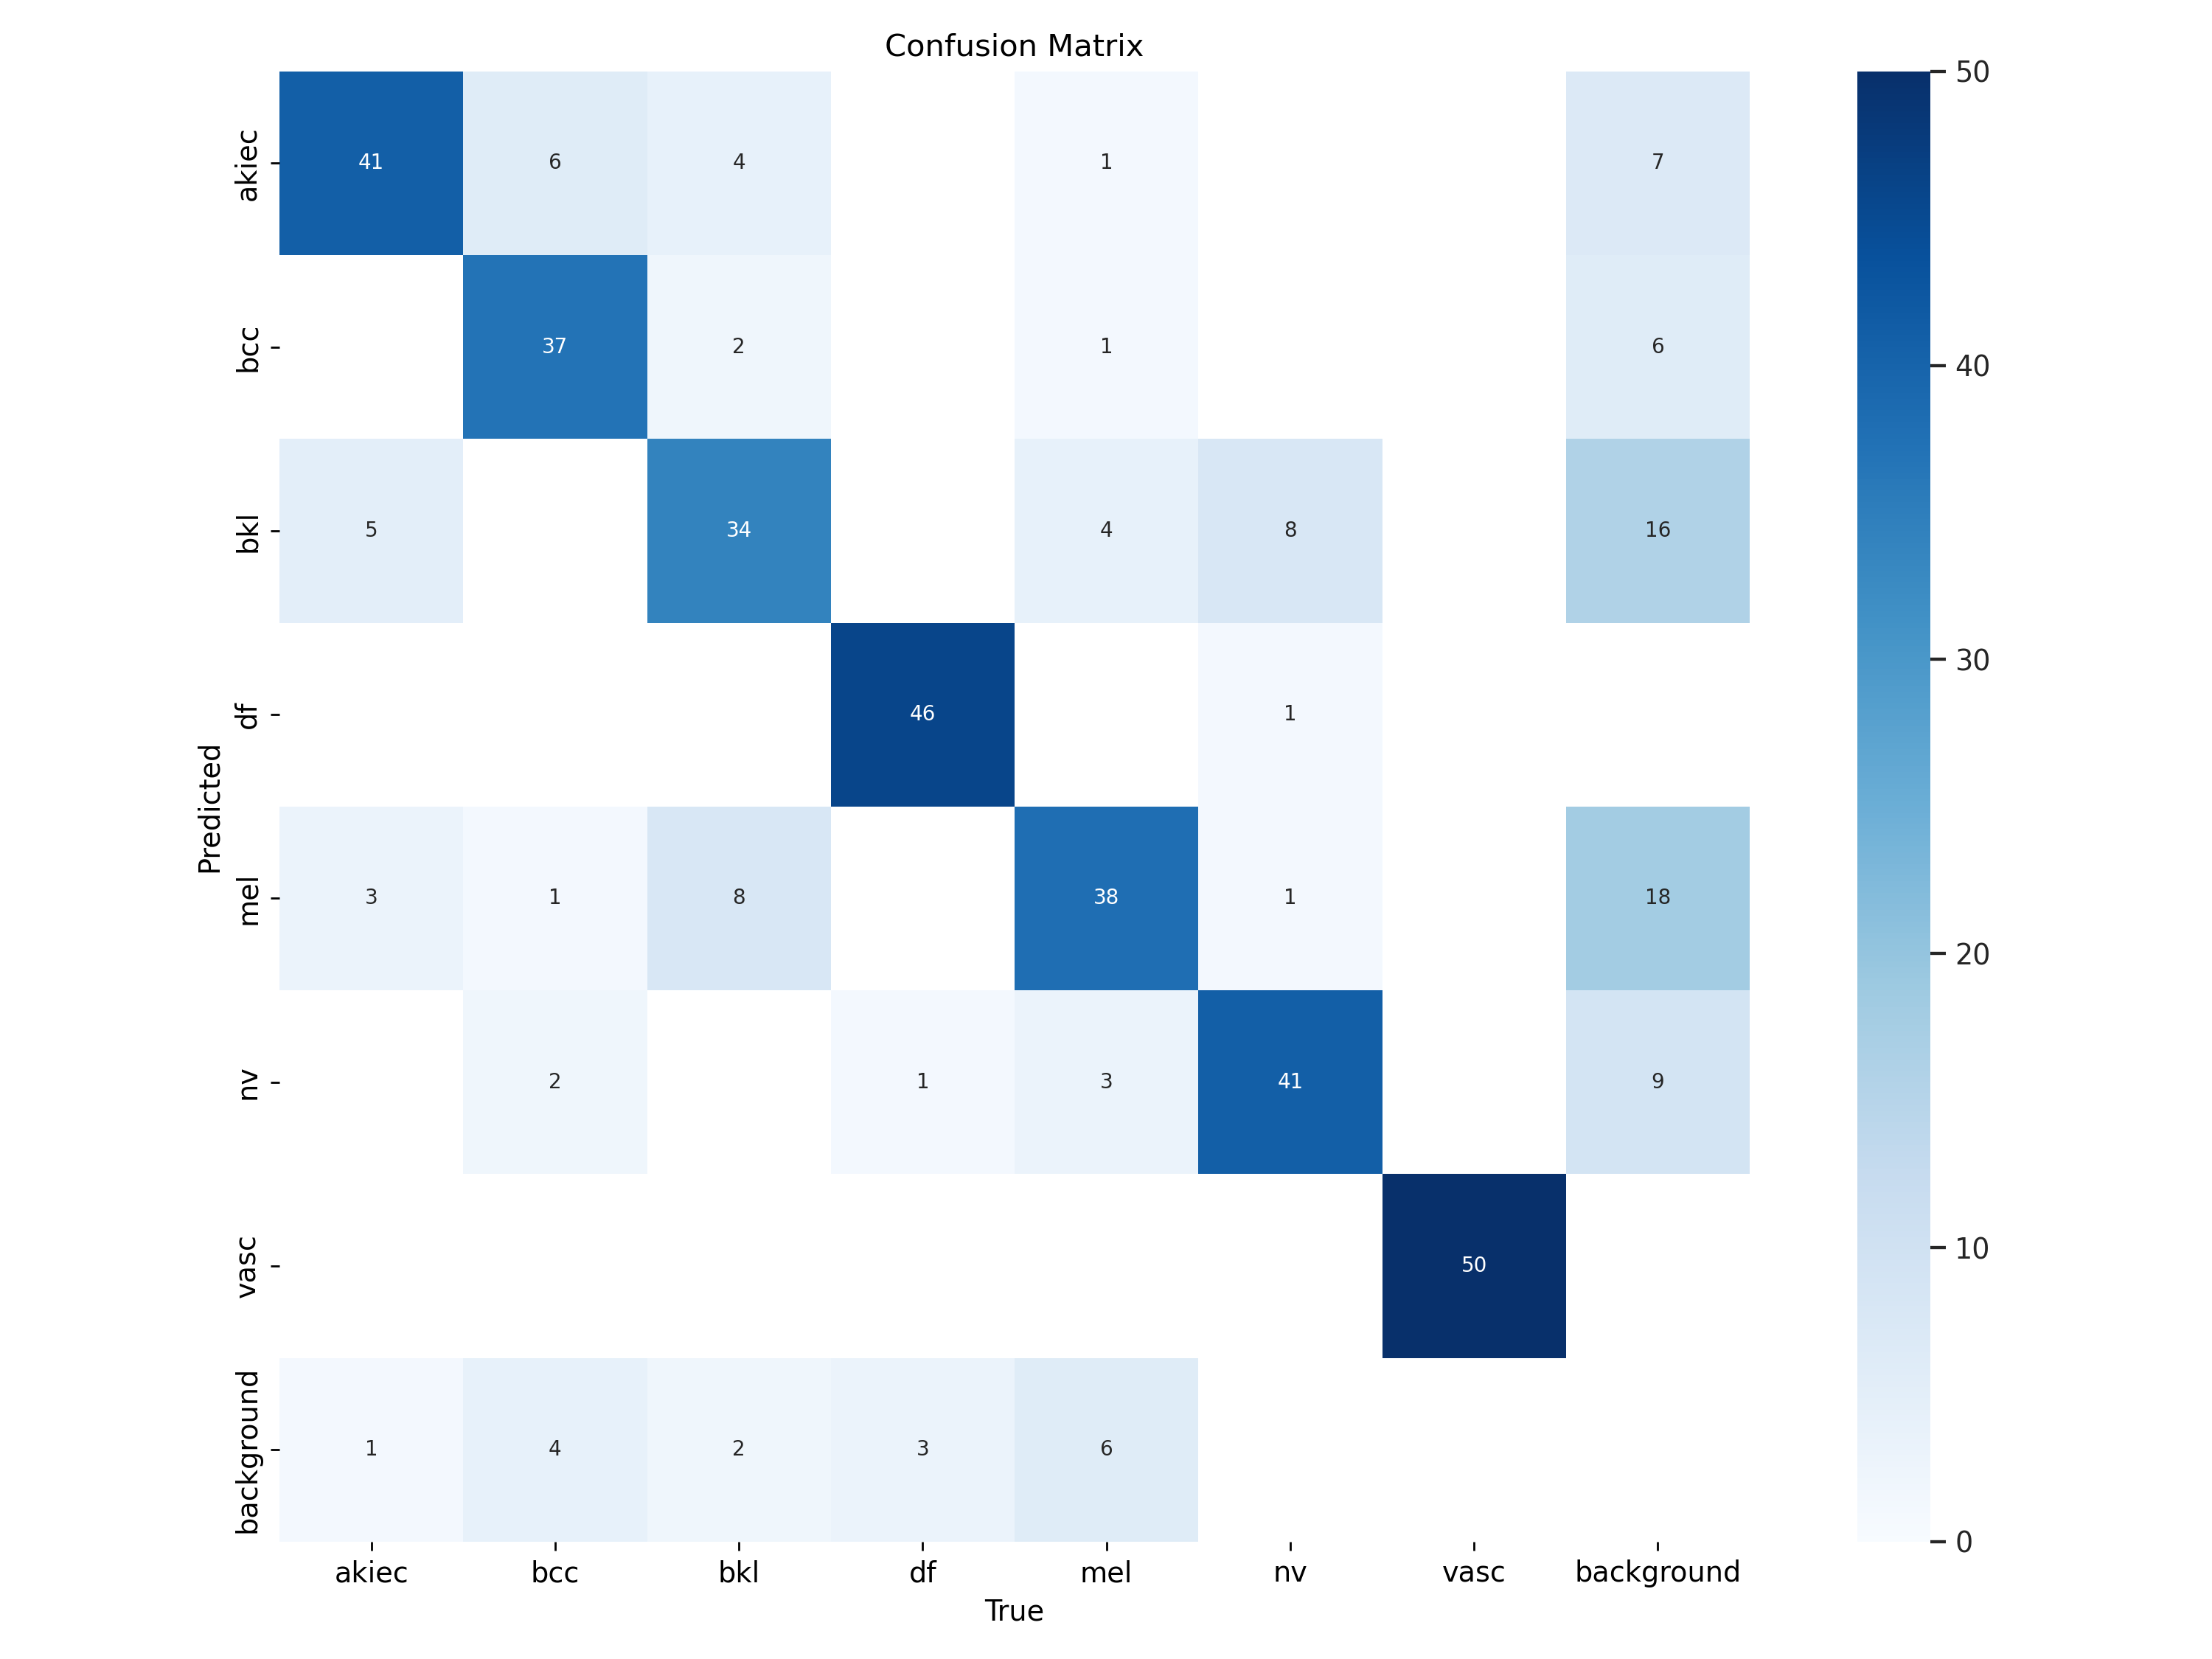

In [41]:
#mengikuti 
Image(filename=f'./runs/detect/val/confusion_matrix.png', width=600)

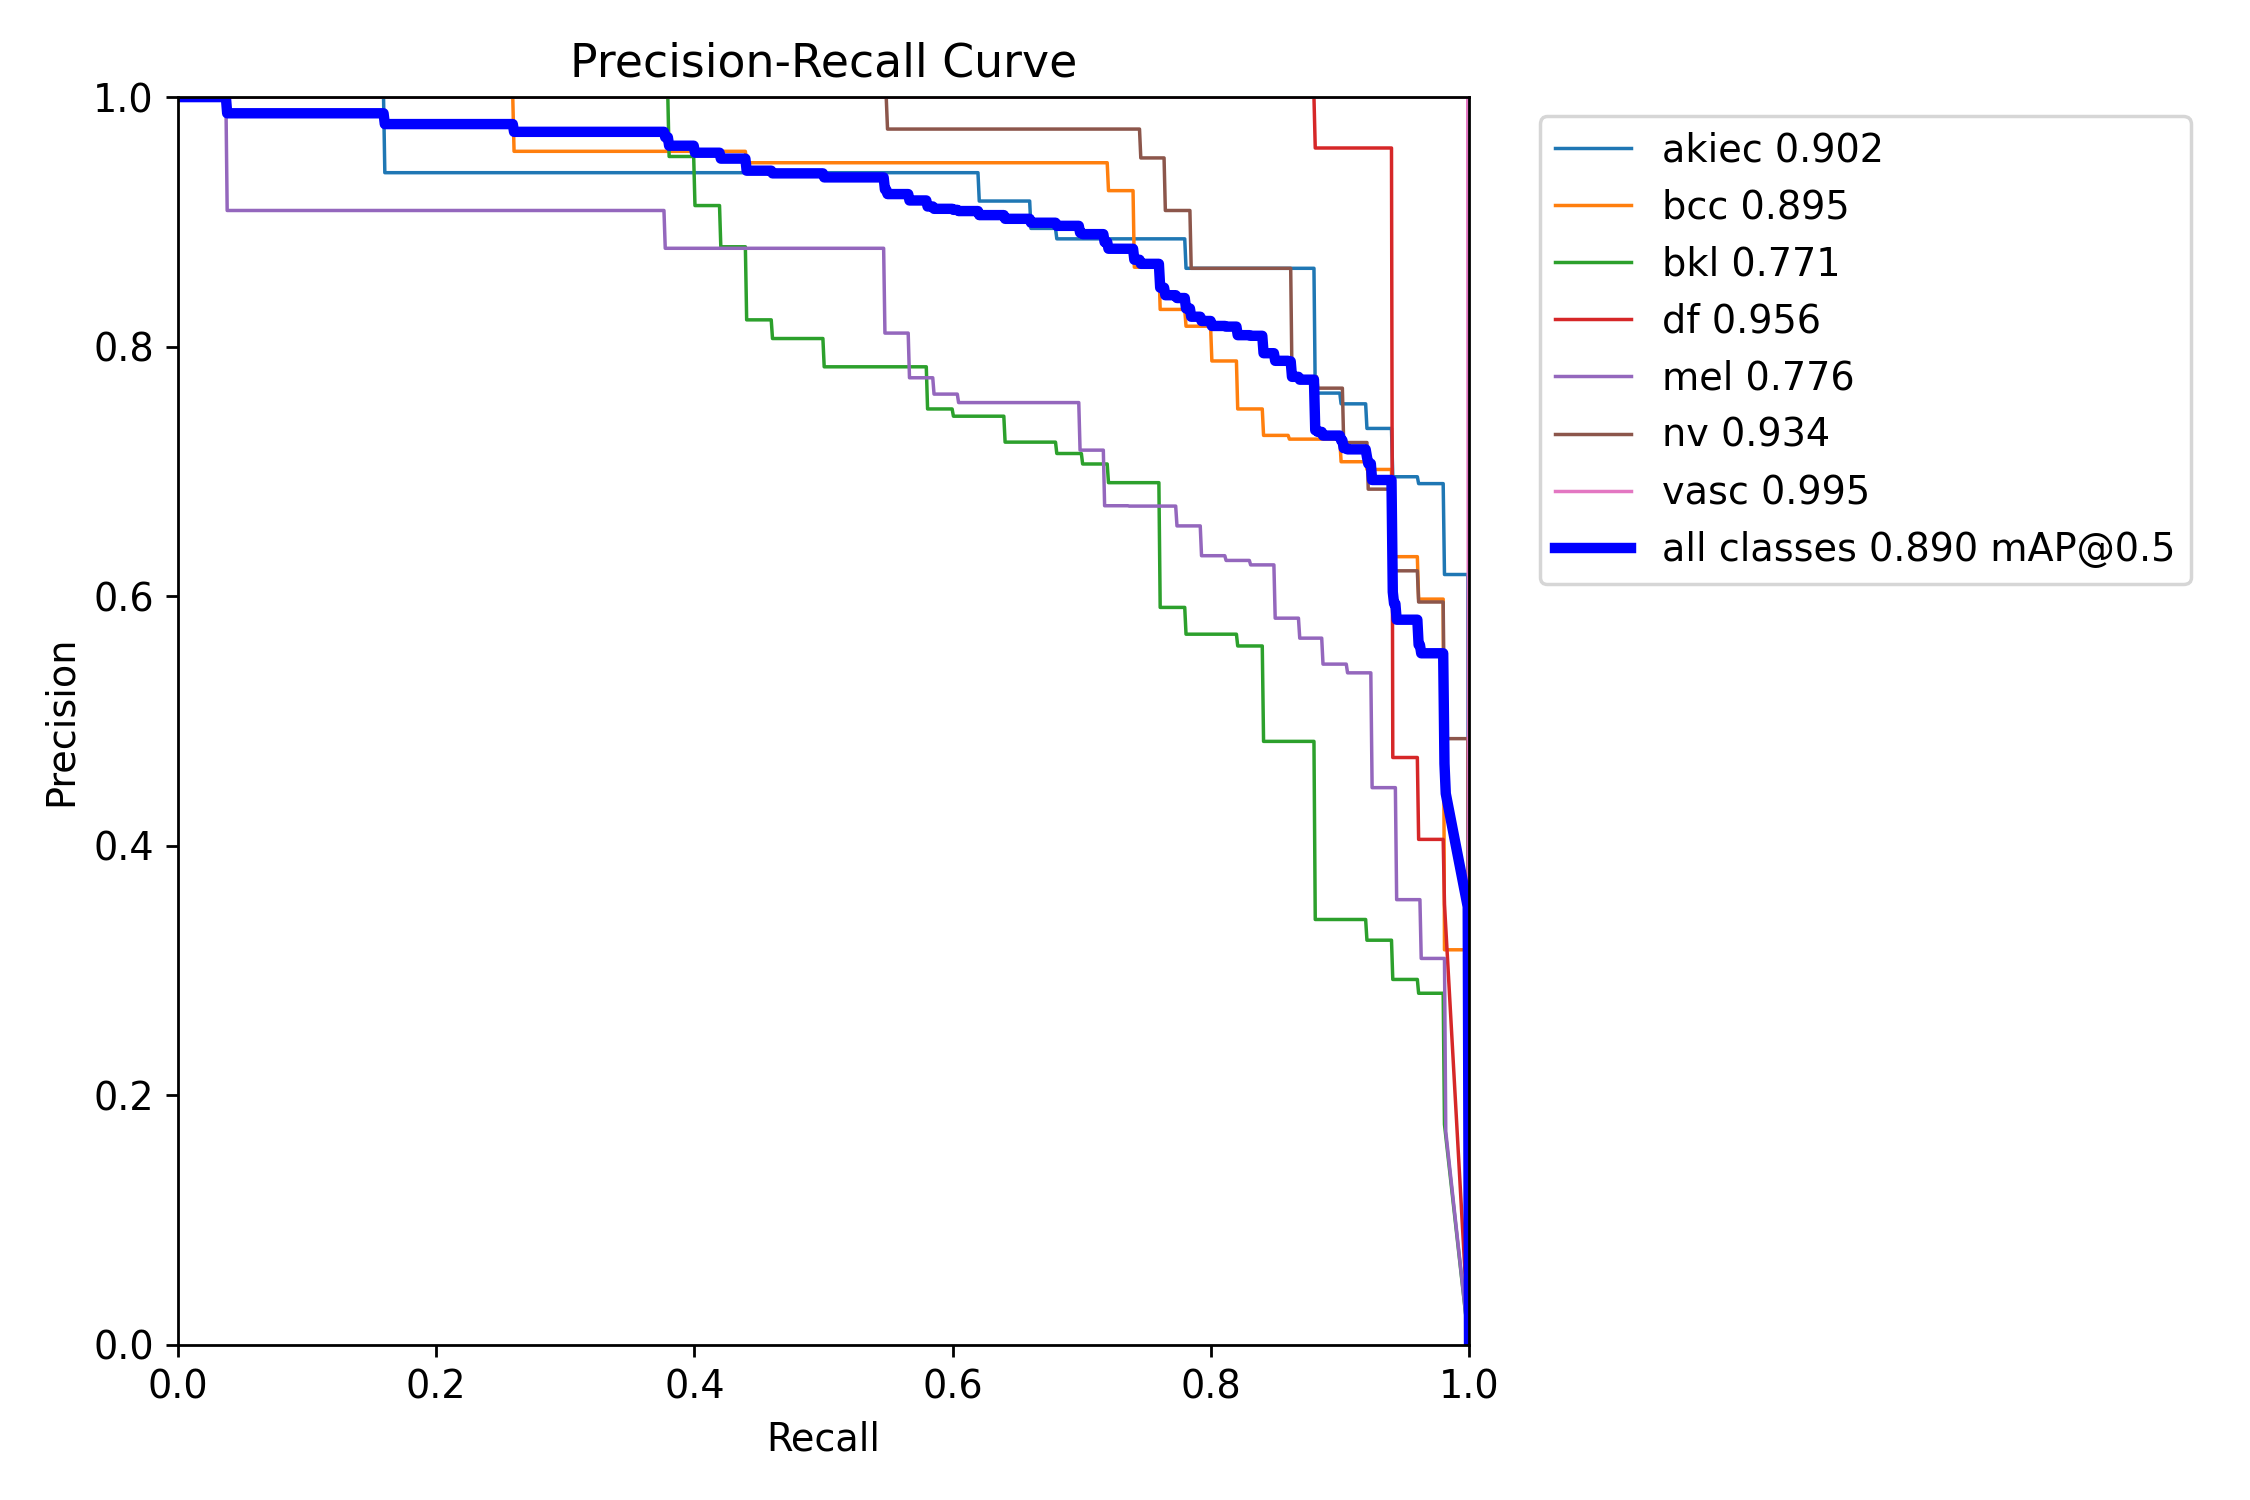

In [43]:
Image(filename=f'./runs/detect/val/PR_curve.png', width=600)

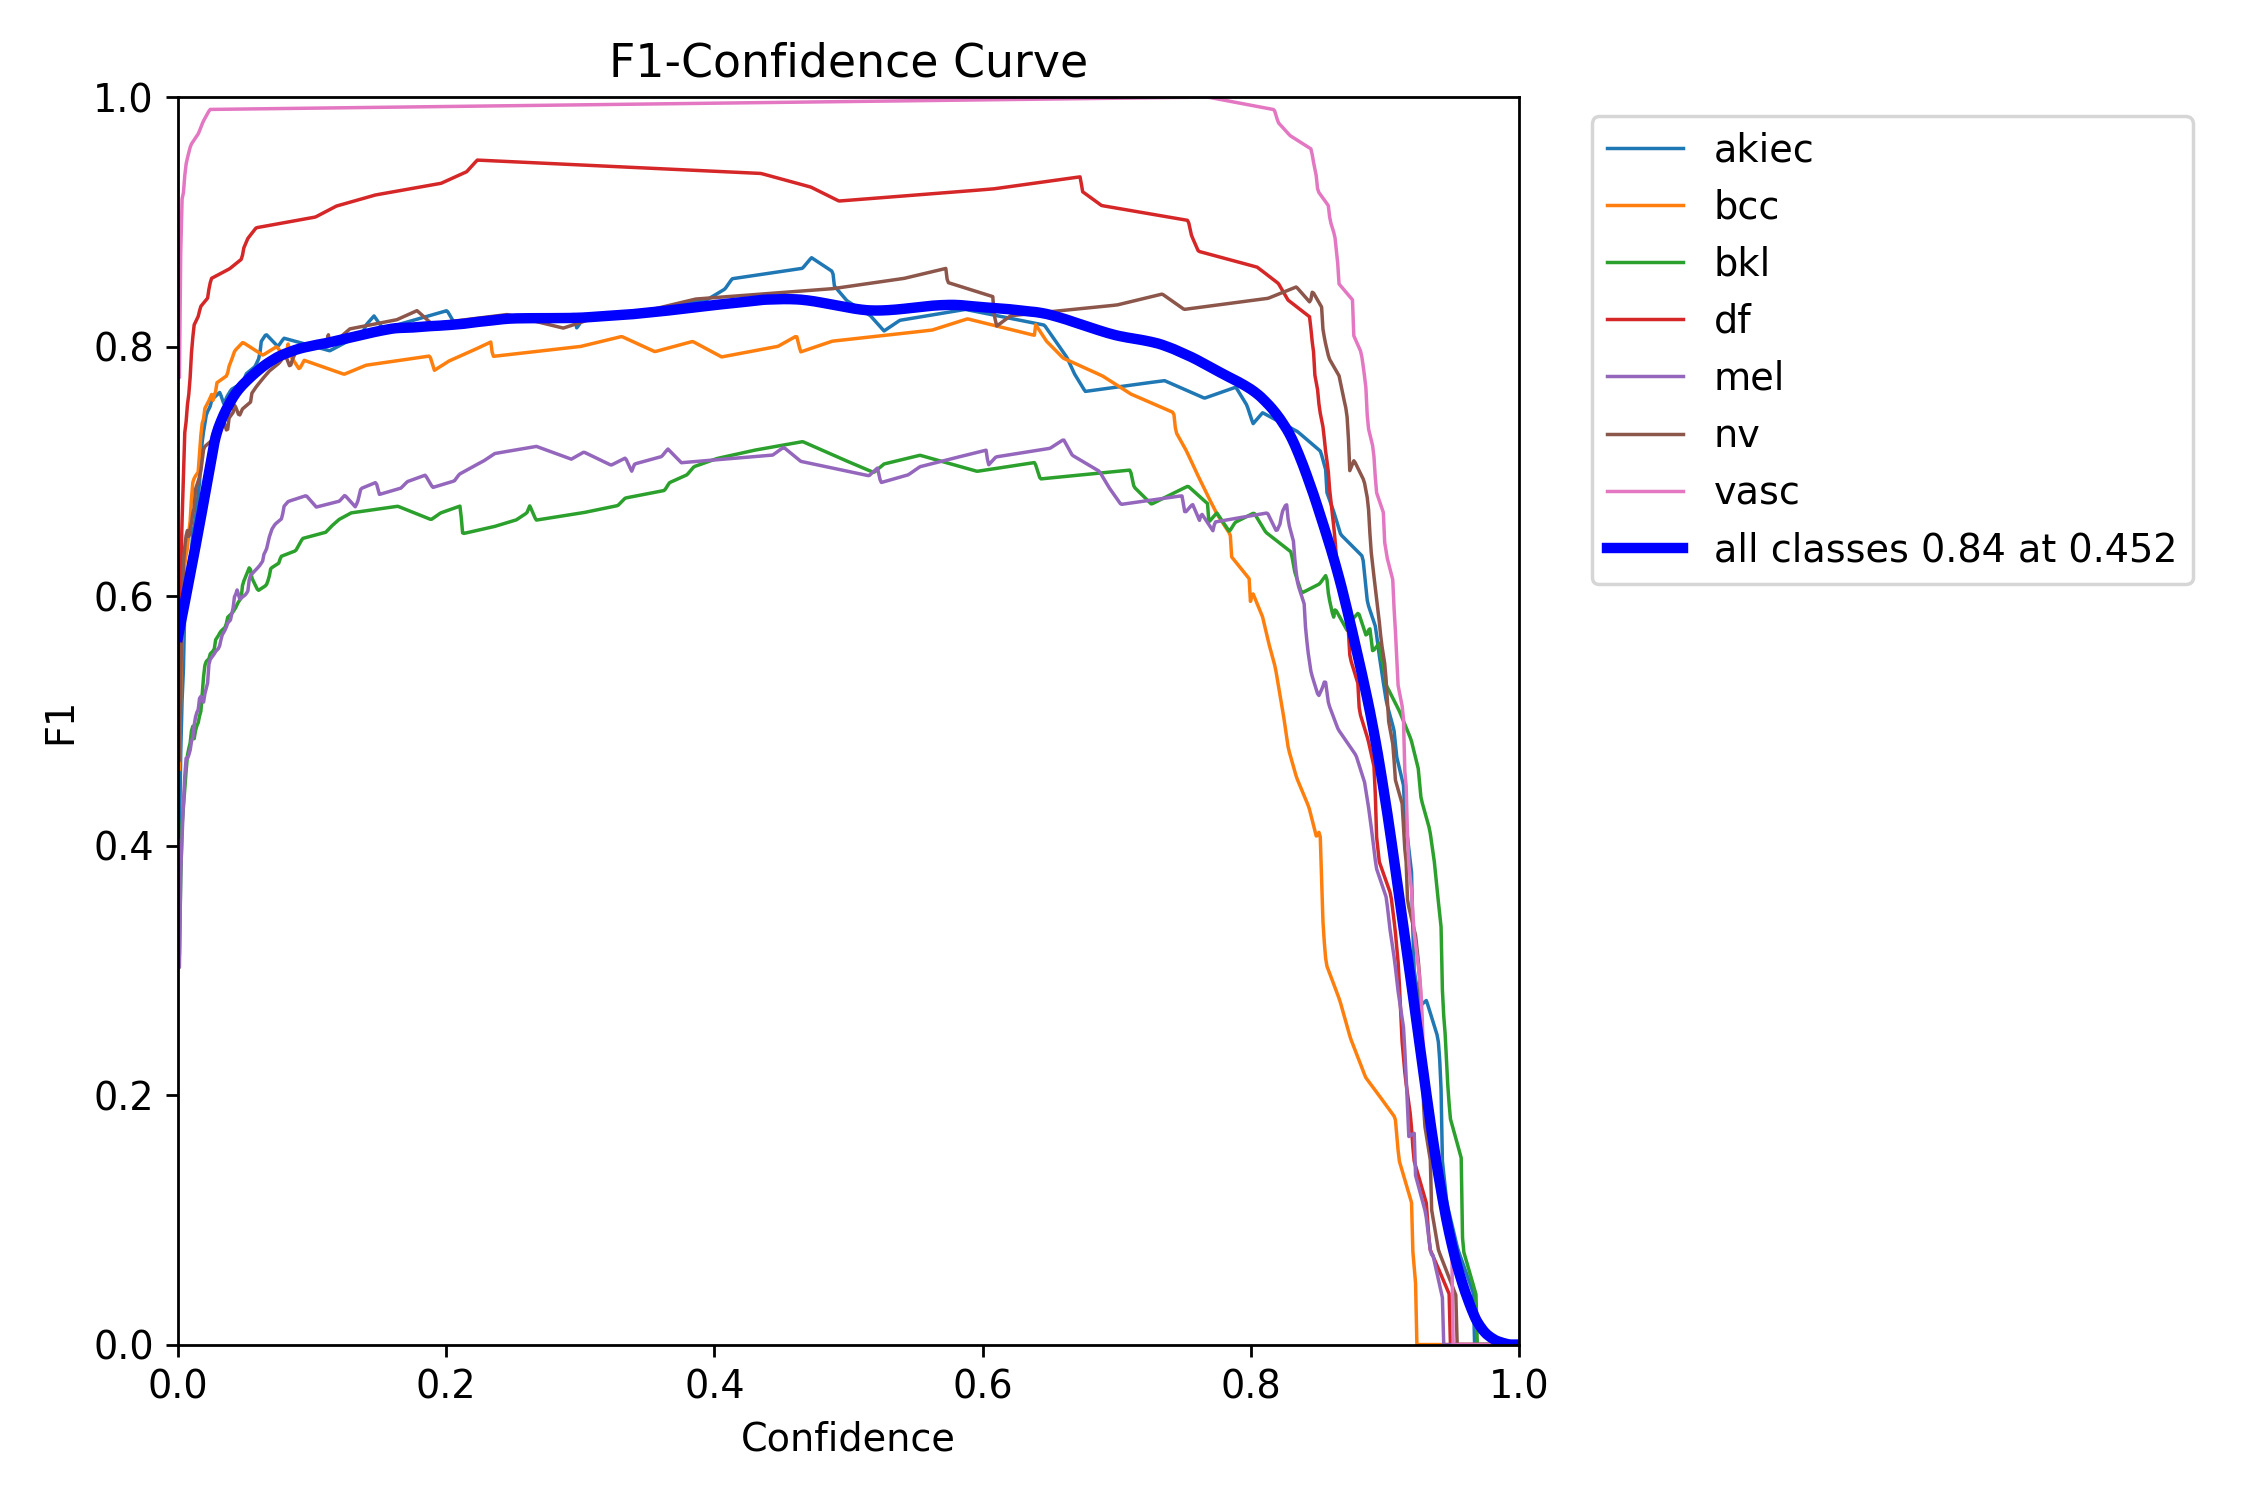

In [45]:
Image(filename=f'./runs/detect/val2/F1_curve.png', width=600)

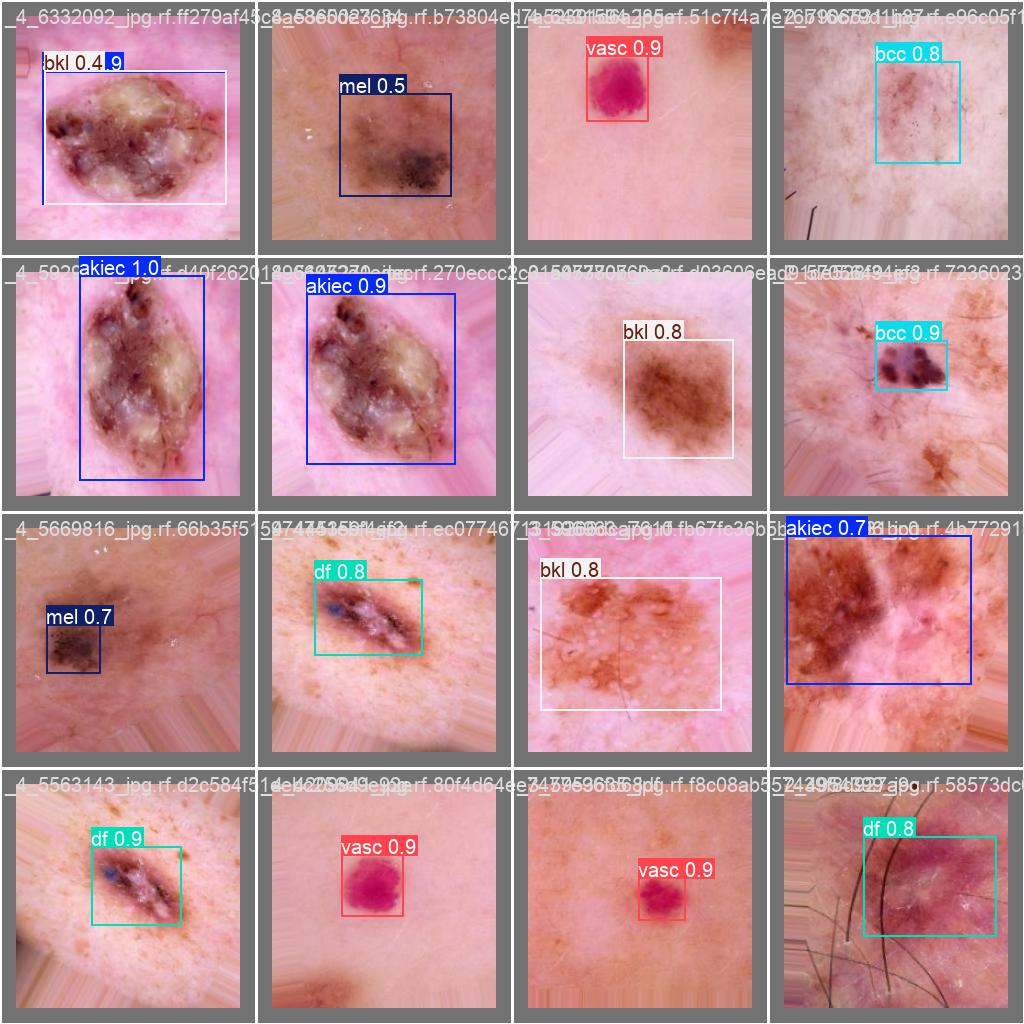

In [44]:
Image(filename=f'./runs/detect/val2/val_batch2_pred.jpg', width=600)